### Fatehinia
#### ex: تولید نقاط تصادفی در گوی واحد
#### link: ``https://vu.um.ac.ir/mod/assign/view.php?id=441612``

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
def sample_by_rejection(D=2, N=10_000):
    A = []

    total_generated = 0
    while len(A) < N:
        sample = np.random.rand(D) * 2 - 1 
        total_generated += 1
        sample_norm = np.linalg.norm(sample, ord=2) 
        if sample_norm <= 1:
            A.append(sample)

    results = np.stack(A)
    ratio = len(A)/total_generated
    return results, total_generated, ratio


N: 12776


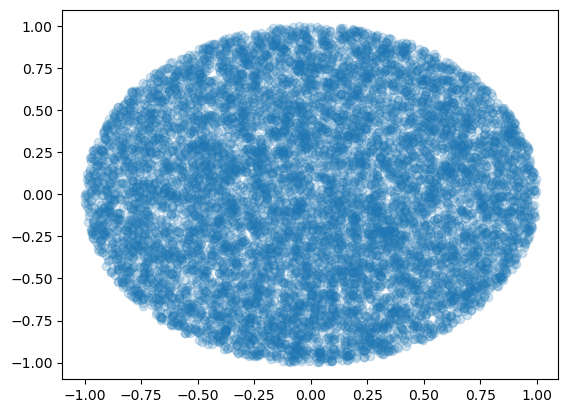

In [34]:
results, N, _ = sample_by_rejection()
print(f"N: {N}")
plt.scatter(results[:, 0], results[:, 1],alpha=0.2)
plt.show()

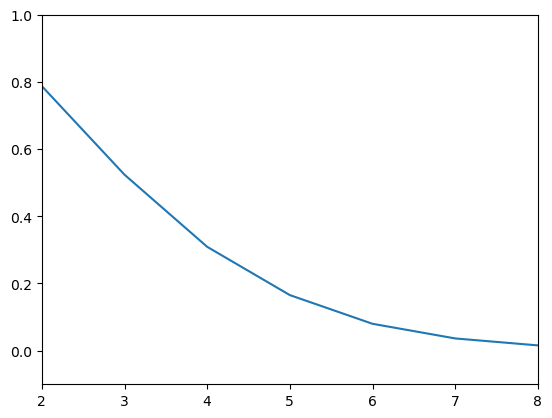

In [40]:
l, r = 2, 9
ratios = [sample_by_rejection(D=i)[2] for i in range(l,r)]
plt.plot(range(l,r), ratios)
plt.xlim(l, r-1)
plt.ylim(-0.1, 1)
plt.show()